In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn
!pip install PyMuPDF
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import os
from PyPDF2 import PdfReader
import nltk
nltk.download('words')
from nltk.corpus import words
set_of_words = set(words.words())

# Step 3: Define the path to your PDF files
folder_path = '/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/Corpus-Technology'

save_path = '/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/Cleaned Corpus-Technology'

# Step 4: Function to extract and clean text from PDF
def extract_clean_text(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""  # Extract text, fallback to empty string if None
        # Filter out non-dictionary words and non-alphabetic characters
        words_filtered = [word for word in text.split() if word.lower() in set_of_words and word.isalpha()]
        return ' '.join(words_filtered)
    except Exception as e:
        print(f"Error processing {pdf_path}: {e}")
        return ""

# Step 5: Iterate over PDFs, extract and clean text, and save it as individual text files
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(folder_path, filename)
        cleaned_text = extract_clean_text(pdf_path)
        # Define the output path for the cleaned text file
        output_file_path = os.path.join(save_path, f"cleaned_{filename[:-4]}.txt")
        with open(output_file_path, 'w') as file:
            file.write(cleaned_text)

print("Text extraction and cleaning complete. Individual output files saved.")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Directory containing your text files
corpus_path = '/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/Cleaned Corpus-Technology'

# Read all text files and store their contents in a list
corpus = []
for filename in os.listdir(corpus_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(corpus_path, filename)
        with open(file_path, 'r') as file:
            text = file.read()
        corpus.append(text)

# Initialize the TfidfVectorizer with your custom settings for TF
vectorizer = TfidfVectorizer(use_idf=True, norm=None, smooth_idf=True, sublinear_tf=False,
                             decode_error='ignore', stop_words='english')

# Fit the vectorizer to the documents
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names to use as DataFrame column headers
feature_names = vectorizer.get_feature_names_out()

# Dense the matrix
dense_tfidf = tfidf_matrix.todense()

# Calculate the modified term frequency across the corpus
# Sum columns of matrix to get total counts per word across all documents
total_counts = np.sum(dense_tfidf, axis=0)
total_words = np.sum(total_counts)

# Compute modified TF as specified
tf_corpus = total_counts / total_words

# Convert to array and squeeze single dimensional entries
tf_corpus = np.squeeze(np.asarray(tf_corpus))

# Map words to their TF-IDF scores
word_tfidf_dict = dict(zip(feature_names, tf_corpus))

# Convert to DataFrame and sort by TF-IDF values
df_tfidf = pd.DataFrame(list(word_tfidf_dict.items()), columns=['Word', 'TF-IDF'])
df_sorted = df_tfidf.sort_values(by='TF-IDF', ascending=False)

# Define the path to the directory
save_path = '/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring'

# Specify the filename you want to save as
filename = 'tfidf_scores5.csv'

# Save DataFrame to CSV
df_sorted.to_csv(os.path.join(save_path, filename), index=False)

print("TF-IDF analysis complete. Scores saved to:", os.path.join(save_path, filename))


TF-IDF analysis complete. Scores saved to: /content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/tfidf_scores5.csv


In [ ]:
from tkinter import W
import pandas as pd
import random

# Load the data
file_path = '/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/tfidf_scores5.csv'
data = pd.read_csv(file_path)

# Calculate the lower and upper bound percentiles for the TF-IDF scores
lower_percentile = data['TF-IDF'].quantile(0.94)
upper_percentile = data['TF-IDF'].quantile(0.97)


# Filter words between the lower and upper percentile
filtered_words = data[(data['TF-IDF'] >= lower_percentile) & (data['TF-IDF'] <= upper_percentile)]


# Sort the DataFrame by TF-IDF scores in descending order
words_sorted = filtered_words.sort_values(by='TF-IDF', ascending=False)


# Print total number of words selected
print(f"Total words selected: {len(words_sorted)}")

word_list = []

# Print all the filtered words
for index, row in words_sorted.iterrows():
    word_list.append(row['Word'])

selected_words = random.sample(word_list, 100)

for word in selected_words:
  print(word)

Total words selected: 510
weight
reverse
understand
association
text
difficult
genetic
prior
listed
fault
anode
facilitate
pretreatment
comparative
orientation
highest
community
mental
failure
choice
account
numerous
antibacterial
substantial
enterprise
relative
private
distributed
annual
quantity
micro
diagram
retailer
attention
extracted
end
entrepreneurial
subject
additive
tam
function
count
political
tool
heterogeneity
fluorescence
measuring
criteria
navigation
accurate
offer
nature
base
typical
usefulness
aggregate
reliability
electron
divided
acoustic
detect
response
measured
diagnosis
yang
institute
platform
prevent
inactivation
optical
wind
productivity
especially
older
determine
investigate
operating
word
commercial
powder
complete
advancement
traceability
mode
crack
bed
distinct
load
downstream
flux
obtain
fully
improvement
assess
bacterial
positively
consistent
income
quantitative
bone


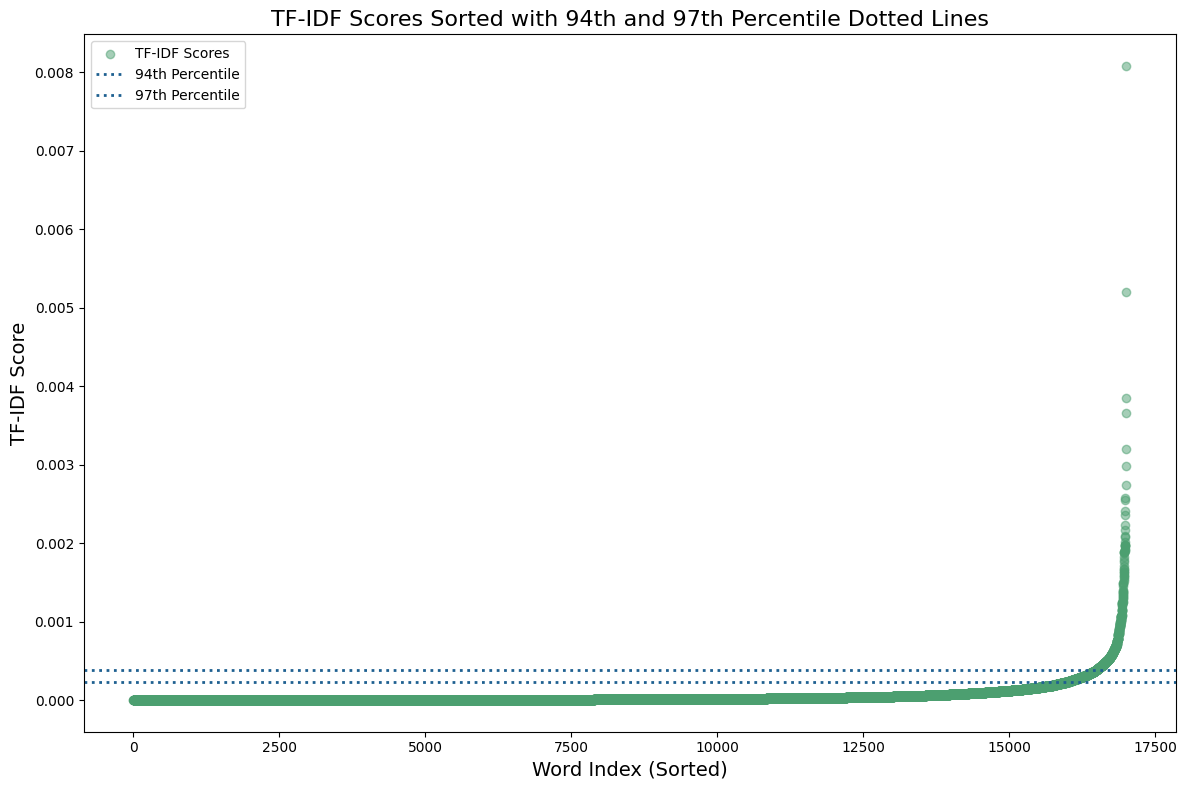

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your TF-IDF dataset
# Replace 'your_file_path.csv' with the actual file path
tfidf_scores_df = pd.read_csv('/content/drive/MyDrive/SAFEGEN: Rcomp/TF-IDF Scoring/tfidf_scores5.csv')

# Sort the TF-IDF scores in ascending order
tfidf_scores_df_sorted = tfidf_scores_df.sort_values(by='TF-IDF').reset_index(drop=True)

# Calculate the 94th and 97th percentiles of the sorted TF-IDF scores
percentile_94 = np.percentile(tfidf_scores_df_sorted['TF-IDF'], 94)
percentile_97 = np.percentile(tfidf_scores_df_sorted['TF-IDF'], 97)

# Create a scatter plot for sorted TF-IDF scores
plt.figure(figsize=(12, 8))
plt.scatter(tfidf_scores_df_sorted.index, tfidf_scores_df_sorted['TF-IDF'], alpha=0.5, label='TF-IDF Scores', color='#4C9F70')

# Add dotted lines for 94th and 97th percentiles
plt.axhline(y=percentile_94, color='#1E6091', linestyle=':', linewidth=2, label='94th Percentile')
plt.axhline(y=percentile_97, color='#1E6091', linestyle=':', linewidth=2, label='97th Percentile')

# Set labels and title
plt.xlabel('Word Index (Sorted)', fontsize=14)
plt.ylabel('TF-IDF Score', fontsize=14)
plt.title('TF-IDF Scores Sorted with 94th and 97th Percentile Dotted Lines', fontsize=16)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
